# Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
from sklearn import metrics
from imblearn.over_sampling import SMOTE

# SMOTE For Relax Data Unbalance

In [2]:
ori_df = pd.read_csv('./dataset/gen/data.csv')

In [3]:
x_data = ori_df.iloc[:,:-1].to_numpy()
y_data = ori_df.iloc[:,-1].to_numpy()

In [4]:
smote = SMOTE(random_state=42)
new_x_data,new_y_data = smote.fit_resample(x_data,y_data)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_data.shape, y_data.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', new_x_data.shape, new_y_data.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(new_y_data).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (32048, 45) (32048,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (45290, 45) (45290,)
SMOTE 적용 후 레이블 값 분포: 
 0    22645
1    22645
Name: count, dtype: int64


In [5]:
x_df = pd.DataFrame(new_x_data, columns=ori_df.columns[:-1])
y_df = pd.DataFrame(new_y_data, columns=[ori_df.columns[-1]])
SMOTE_df = pd.concat([x_df,y_df], axis=1)
SMOTE_df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
0,202.000000,4.000000,4.000000,202.000000,4.000000,4.000000,0.180000,2.070000e-02,329.000000,2.770000,...,4.000000,4.000000,0.524000,2.740000e-19,329.000000,0.000000,6.960000e-07,16.000000,50.000000,0
1,202.000000,-6.800000,-346.000000,202.000000,-9.600000,-354.000000,-10.900000,1.860000e-01,328.000000,23.300000,...,4.000000,4.000000,-0.288000,2.740000e-19,328.000000,0.000000,-5.270000e-07,16.000000,50.000000,0
2,200.000000,-13.800000,-2.250000,200.000000,-13.900000,3.999905,-8.590000,1.400000e-01,328.000000,30.600000,...,4.000000,4.000000,0.524000,2.740000e-19,328.000000,0.000000,9.100000e-07,16.000000,50.000000,0
3,198.000000,-14.000000,4.000000,198.000000,-13.900000,3.999905,-6.110000,1.300000e-01,327.000000,30.300000,...,4.000000,4.000000,-0.180000,2.740000e-19,328.000000,0.000000,1.070000e-06,16.000000,50.000000,0
4,197.000000,-13.900000,-14.800000,196.000000,-13.900000,4.000095,-5.700000,1.140000e-01,328.000000,30.500000,...,4.000000,4.000000,0.226000,2.740000e-19,328.000000,0.000000,1.960000e-06,16.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,164.875376,5.184075,-24.003208,164.875376,5.219789,5.000000,2.050301,4.434864e-02,324.853474,5.462039,...,58.300000,5.000000,23.687915,9.722357e-01,320.706948,117.853474,1.870076e-01,17.000000,8.051361,1
45286,159.186290,-3.830530,-971.445575,159.186290,-5.779435,5.000000,-18.032339,2.918823e-01,324.203428,25.682862,...,58.300000,5.000000,23.177721,9.261647e-01,320.186290,118.000000,1.773212e-01,17.000000,10.779435,1
45287,163.708695,4.316441,83.141247,163.708695,4.155709,4.640532,1.204446,3.701584e-02,325.286200,1.402896,...,57.870699,4.570699,23.644121,1.013653e+00,319.000000,115.000000,1.955588e-01,16.570699,28.586012,1
45288,173.000000,3.447687,-25.223552,173.000000,3.500000,3.500000,0.006652,2.790000e-19,328.000000,0.000000,...,30.150000,3.500000,-2.535778,0.000000e+00,331.000000,0.000000,-6.136825e-06,15.500000,50.000000,1


In [6]:
SMOTE_df.to_csv('./dataset/gen/SMOTE_df.csv',index=False)

# Preprocess For PCA

## Load Data

In [7]:
ori_df = pd.read_csv('./dataset/gen/SMOTE_df.csv')

In [8]:
pd.set_option('display.max_columns', 50)
ori_df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,X_OutputPower,Y_ActualPosition,Y_ActualVelocity,Y_ActualAcceleration,Y_SetPosition,Y_SetVelocity,Y_SetAcceleration,Y_CurrentFeedback,Y_DCBusVoltage,Y_OutputCurrent,Y_OutputVoltage,Y_OutputPower,Z_ActualPosition,Z_ActualVelocity,Z_ActualAcceleration,Z_SetPosition,Z_SetVelocity,Z_SetAcceleration,Z_CurrentFeedback,Z_DCBusVoltage,Z_OutputCurrent,Z_OutputVoltage,S_ActualPosition,S_ActualVelocity,S_ActualAcceleration,S_SetPosition,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
0,202.000000,4.000000,4.000000,202.000000,4.000000,4.000000,0.180000,2.070000e-02,329.000000,2.770000,-0.000001,162.000000,3.975000,-2.250000,162.000000,4.000000,4.000000,0.539000,1.670000e-02,328.000000,1.840000,6.430000e-07,123.000000,4.000000,4.000000,123.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.001000,4.250000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,329.000000,0.000000,6.960000e-07,16.000000,50.000000,0
1,202.000000,-6.800000,-346.000000,202.000000,-9.600000,-354.000000,-10.900000,1.860000e-01,328.000000,23.300000,0.004480,162.000000,-15.800000,-746.000000,161.000000,-20.600000,-643.000000,-14.500000,2.810000e-01,325.000000,37.800000,1.260000e-02,123.000000,-16.300000,-708.000000,122.000000,-21.600000,-670.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,4.250000,-357.000000,4.000000,4.000000,-0.288000,2.740000e-19,328.000000,0.000000,-5.270000e-07,16.000000,50.000000,0
2,200.000000,-13.800000,-2.250000,200.000000,-13.900000,3.999905,-8.590000,1.400000e-01,328.000000,30.600000,0.005330,158.000000,-28.500000,4.000000,158.000000,-28.300000,3.999905,-7.790000,1.390000e-01,327.000000,49.400000,9.430000e-03,119.000000,-29.700000,41.500000,119.000000,-29.700000,3.999905,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.562000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,328.000000,0.000000,9.100000e-07,16.000000,50.000000,0
3,198.000000,-14.000000,4.000000,198.000000,-13.900000,3.999905,-6.110000,1.300000e-01,327.000000,30.300000,0.004890,155.000000,-28.600000,-58.500000,155.000000,-28.300000,3.999905,-8.130000,1.560000e-01,325.000000,47.600000,1.050000e-02,116.000000,-29.700000,-2.250000,116.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,3.999000,3.750000,-357.000000,4.000000,4.000000,-0.180000,2.740000e-19,328.000000,0.000000,1.070000e-06,16.000000,50.000000,0
4,197.000000,-13.900000,-14.800000,196.000000,-13.900000,4.000095,-5.700000,1.140000e-01,328.000000,30.500000,0.004250,152.000000,-28.000000,142.000000,152.000000,-28.300000,4.000095,-13.800000,2.020000e-01,326.000000,47.100000,1.350000e-02,113.000000,-29.600000,22.800000,112.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.812000,-357.000000,4.000000,4.000000,0.226000,2.740000e-19,328.000000,0.000000,1.960000e-06,16.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,164.875376,5.184075,-24.003208,164.875376,5.219789,5.000000,2.050301,4.434864e-02,324.853474,5.462039,-0.000013,106.293052,1.391298,216.531350,106.293052,1.344413,5.000000,-5.416009,1.297734e-01,322.853474,17.741845,2.360077e-03,34.612085,4.975000,-1.707893,34.612085,5.000000,5.000000,0.0,0.0,0.0,0.0,-58.192587,58.221979,-59.170377,-57.851197,58.300000,5.000000,23.687915,9.722357e-01,320.706948,117.853474,1.870076e-01,17.000000,8.051361,1
45286,159.186290,-3.830530,-971.445575,159.186290,-5.779435,5.000000,-18.032339,2.918823e-01,324.203428,25.682862,0.006026,101.897175,5.064400,38.461344,101.897175,5.000000,5.000000,2.536376,6.012520e-02,323.203428,3.586788,-1.710079e-05,34.496572,5.000000,5.000000,34.496572,5.000000,5.000000,0.0,0.0,0.0,0.0,893.610283,58.320343,2.842464,89

## Generate Function & Designate Number of Components

In [48]:
class handmade_pca:
    def __init__(self, df):
        self.df = df
        print('변수:')
        for idx, col in enumerate(df.columns.tolist()):
            print(idx+1, col)
        print("\n'.하나 이상의 독립변수와 종속변수 하나를 지정해주세요.")
        print("위의 보기를 확인하고 독립변수들의 번호를 x, 종속변수의 번호를 y에 넣어주세요.")
        print("지정 후, .set_data()를 통해 분석을 위한 데이터를 생성해주세요.")
        print("ex1) x: 1 2 3 4 5 8 9 10 / y = 46")
        print("ex2) x: 1:5 8:10 / y = 46")
        print('ex3) x: 1:5 8 9 10 / y = 46')
        
        try:
            x = input('x: ')
            x = x.split(' ')

            origin = x[0]
            for i in range(len(x)):
                if origin != x[i]:
                    i += 2
                if i != len(x)-1:
                    origin = x[i+1]
                if ':' in str(x[i]):
                    x[i] = x[i].split(':')
                    t = [j for j in range(int(x[i][0])-1,int(x[i][1]))]
                    x.pop(i)
                    for k in sorted(t,reverse=True):
                        x.insert(i, k)

                else:
                    x[i]=int(x[i])
                    x[i] -= 1

            y = int(input('y: '))
            y -= 1
            y = [y]

            self.x = x
            self.y = y
            
        except:
            print('번호를 다시 한 번 확인해주세요.')
        
        
    def set_data(self):
        try:
            self.x_data = self.df.iloc[:,self.x]
            self.y_data = self.df.iloc[:,self.y]

            self.df = pd.concat([self.x_data,self.y_data],axis=1)

            print('.pca()를 통해 주성분분석을 진행하세요.')

            return self.df
    
        except:
            print('앞서 입력하신 번호가 중복되거나 범위 안에 있는지 다시 한 번 확인해주세요.')
        
    def pca(self):
        try:
            col = self.x_data.columns
            x = StandardScaler().fit_transform(self.x_data)

            features =x.T
            cov_mat = np.cov(features)

            values, vectors = np.linalg.eig(cov_mat)

            explained_variances = []
            for i in range(len(values)):
                explained_variances.append(values[i] / np.sum(values))
            explained_variances = sorted(explained_variances, reverse=True) 

            plt.plot(explained_variances)
            plt.xlabel('Number of Components')
            plt.ylabel('Explained Variance')
            plt.title('Scree Plot')
            plt.xticks(np.arange(0,len(explained_variances),2))
            plt.show()

            df_for_explain = pd.DataFrame({'고유값' : np.array(values),
                               '기여율(설명력)' : np.array(explained_variances)})
            df_for_explain['누적 기여율'] = df_for_explain['기여율(설명력)'].cumsum()

            idx = df_for_explain.index
            df_for_explain = df_for_explain.T
            df_for_explain.columns = [f'PC{i+1}' for i in idx]

            for col in range(len(df_for_explain.columns)):
                if df_for_explain.iloc[2,col] > 0.8:
                    num_PC = col+1
                    break

            print(df_for_explain)
            print("\n위의 'Scree Plot'과 표를 참고하여 주성분 개수를 입력해주세요.")
            print("일반적으로 Scree Plot의 기울기가 완만해지는 시점이나 누적 기여율이 80%~90%인 시점에서 주성분 개수를 결정합니다.")
            print(f'추천 주성분 개수: {num_PC}')
            compo = int(input("주성분 개수: "))

            do_pca = PCA(n_components=compo)
            printcipalComponents = do_pca.fit_transform(x)
            pca_df = pd.DataFrame(data=printcipalComponents,
                                  columns = [f'PC{num+1}' for num in range(len(printcipalComponents[0]))])
            self.pca_df = pd.concat([pca_df,self.y_data],axis=1)

            return self.pca_df
        
        except:
            print('입력하신 주성분 개수를 다시 한 번 확인해주세요')

In [49]:
pca = handmade_pca(ori_df)

변수:
1 X_ActualPosition
2 X_ActualVelocity
3 X_ActualAcceleration
4 X_SetPosition
5 X_SetVelocity
6 X_SetAcceleration
7 X_CurrentFeedback
8 X_DCBusVoltage
9 X_OutputCurrent
10 X_OutputVoltage
11 X_OutputPower
12 Y_ActualPosition
13 Y_ActualVelocity
14 Y_ActualAcceleration
15 Y_SetPosition
16 Y_SetVelocity
17 Y_SetAcceleration
18 Y_CurrentFeedback
19 Y_DCBusVoltage
20 Y_OutputCurrent
21 Y_OutputVoltage
22 Y_OutputPower
23 Z_ActualPosition
24 Z_ActualVelocity
25 Z_ActualAcceleration
26 Z_SetPosition
27 Z_SetVelocity
28 Z_SetAcceleration
29 Z_CurrentFeedback
30 Z_DCBusVoltage
31 Z_OutputCurrent
32 Z_OutputVoltage
33 S_ActualPosition
34 S_ActualVelocity
35 S_ActualAcceleration
36 S_SetPosition
37 S_SetVelocity
38 S_SetAcceleration
39 S_CurrentFeedback
40 S_DCBusVoltage
41 S_OutputCurrent
42 S_OutputVoltage
43 S_OutputPower
44 S_SystemInertia
45 M_CURRENT_FEEDRATE
46 error

'.하나 이상의 독립변수와 종속변수 하나를 지정해주세요.
위의 보기를 확인하고 독립변수들의 번호를 x, 종속변수의 번호를 y에 넣어주세요.
지정 후, .set_data()를 통해 분석을 위한 데이터를 생성해주세요.

In [50]:
pca.set_data()

.pca()를 통해 주성분분석을 진행하세요.


,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,X_OutputPower,Y_ActualPosition,Y_ActualVelocity,Y_ActualAcceleration,Y_SetPosition,Y_SetVelocity,Y_SetAcceleration,Y_CurrentFeedback,Y_DCBusVoltage,Y_OutputCurrent,Y_OutputVoltage,Y_OutputPower,Z_ActualPosition,Z_ActualVelocity,Z_ActualAcceleration,Z_SetPosition,Z_SetVelocity,Z_SetAcceleration,Z_CurrentFeedback,Z_DCBusVoltage,Z_OutputCurrent,Z_OutputVoltage,S_ActualPosition,S_ActualVelocity,S_ActualAcceleration,S_SetPosition,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
0,202.000000,4.000000,4.000000,202.000000,4.000000,4.000000,0.180000,2.070000e-02,329.000000,2.770000,-0.000001,162.000000,3.975000,-2.250000,162.000000,4.000000,4.000000,0.539000,1.670000e-02,328.000000,1.840000,6.430000e-07,123.000000,4.000000,4.000000,123.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.001000,4.250000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,329.000000,0.000000,6.960000e-07,16.000000,50.000000,0
1,202.000000,-6.800000,-346.000000,202.000000,-9.600000,-354.000000,-10.900000,1.860000e-01,328.000000,23.300000,0.004480,162.000000,-15.800000,-746.000000,161.000000,-20.600000,-643.000000,-14.500000,2.810000e-01,325.000000,37.800000,1.260000e-02,123.000000,-16.300000,-708.000000,122.000000,-21.600000,-670.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,4.250000,-357.000000,4.000000,4.000000,-0.288000,2.740000e-19,328.000000,0.000000,-5.270000e-07,16.000000,50.000000,0
2,200.000000,-13.800000,-2.250000,200.000000,-13.900000,3.999905,-8.590000,1.400000e-01,328.000000,30.600000,0.005330,158.000000,-28.500000,4.000000,158.000000,-28.300000,3.999905,-7.790000,1.390000e-01,327.000000,49.400000,9.430000e-03,119.000000,-29.700000,41.500000,119.000000,-29.700000,3.999905,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.562000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,328.000000,0.000000,9.100000e-07,16.000000,50.000000,0
3,198.000000,-14.000000,4.000000,198.000000,-13.900000,3.999905,-6.110000,1.300000e-01,327.000000,30.300000,0.004890,155.000000,-28.600000,-58.500000,155.000000,-28.300000,3.999905,-8.130000,1.560000e-01,325.000000,47.600000,1.050000e-02,116.000000,-29.700000,-2.250000,116.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,3.999000,3.750000,-357.000000,4.000000,4.000000,-0.180000,2.740000e-19,328.000000,0.000000,1.070000e-06,16.000000,50.000000,0
4,197.000000,-13.900000,-14.800000,196.000000,-13.900000,4.000095,-5.700000,1.140000e-01,328.000000,30.500000,0.004250,152.000000,-28.000000,142.000000,152.000000,-28.300000,4.000095,-13.800000,2.020000e-01,326.000000,47.100000,1.350000e-02,113.000000,-29.600000,22.800000,112.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.812000,-357.000000,4.000000,4.000000,0.226000,2.740000e-19,328.000000,0.000000,1.960000e-06,16.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,164.875376,5.184075,-24.003208,164.875376,5.219789,5.000000,2.050301,4.434864e-02,324.853474,5.462039,-0.000013,106.293052,1.391298,216.531350,106.293052,1.344413,5.000000,-5.416009,1.297734e-01,322.853474,17.741845,2.360077e-03,34.612085,4.975000,-1.707893,34.612085,5.000000,5.000000,0.0,0.0,0.0,0.0,-58.192587,58.221979,-59.170377,-57.851197,58.300000,5.000000,23.687915,9.722357e-01,320.706948,117.853474,1.870076e-01,17.000000,8.051361,1
45286,159.186290,-3.830530,-971.445575,159.186290,-5.779435,5.000000,-18.032339,2.918823e-01,324.203428,25.682862,0.006026,101.897175,5.064400,38.461344,101.897175,5.000000,5.000000,2.536376,6.012520e-02,323.203428,3.586788,-1.710079e-05,34.496572,5.000000,5.000000,34.496572,5.000000,5.000000,0.0,0.0,0.0,0.0,893.610283,58.320343,2.842464,89

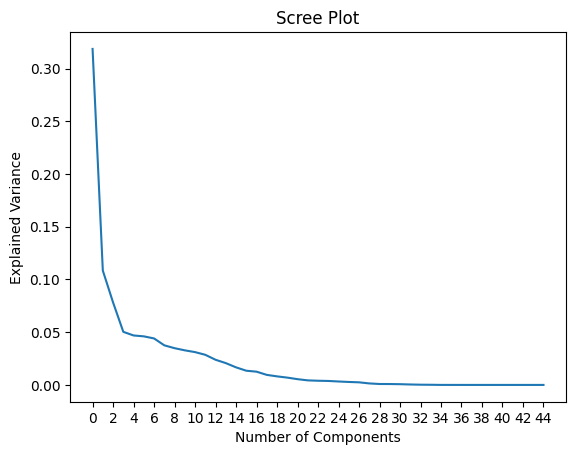

                PC1       PC2       PC3       PC4       PC5       PC6   
고유값       13.065250  4.445617  3.206374  2.063596  1.923310  1.888568  \
기여율(설명력)   0.318658  0.108427  0.078203  0.050331  0.046909  0.046062   
누적 기여율     0.318658  0.427085  0.505287  0.555618  0.602527  0.648589   

               PC7       PC8       PC9      PC10      PC11      PC12   
고유값       1.807110  1.539549  1.428790  1.344684  1.275867  1.171021  \
기여율(설명력)  0.044075  0.037549  0.034848  0.032796  0.031118  0.028561   
누적 기여율    0.692663  0.730213  0.765060  0.797857  0.828975  0.857536   

              PC13      PC14      PC15      PC16      PC17      PC18   
고유값       0.978388  0.848304  0.683101  0.552167  0.515025  0.390526  \
기여율(설명력)  0.023863  0.020690  0.016661  0.013467  0.012561  0.009525   
누적 기여율    0.881398  0.902088  0.918749  0.932216  0.944777  0.954302   

              PC19      PC20      PC21      PC22      PC23      PC24   
고유값       0.332545  0.284168  0.223646  0.176701  0.16259

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,error
0,-6.141346,-0.210727,0.552069,-0.231067,-0.356036,-0.729414,-0.655808,-0.195942,0.063171,-0.019868,0.011367,0
1,-3.868874,11.713994,0.125775,-2.223754,5.579470,-13.580729,10.208207,-2.302835,-6.766420,4.925120,-1.575148,0
2,-4.287864,12.596599,-1.230339,-0.310848,-1.064837,-0.463339,-1.007777,-0.198209,0.110078,-0.175831,0.307595,0
3,-3.887103,12.724230,-0.968730,-0.603917,-0.720278,-0.836930,-0.755065,-0.415287,-0.003013,-0.108132,0.115512,0
4,-3.881390,13.217775,-0.959851,-0.630848,-1.009083,-0.242324,-0.845004,0.932591,0.343477,-0.275767,0.135598,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45285,2.636730,0.519017,0.265648,-0.900530,-0.149808,-0.423326,-1.101999,1.645270,0.459027,-0.025279,-1.345902,1
45286,4.090798,1.917099,-1.568419,4.231461,-2.654604,-2.893931,-0.740785,1.159976,-5.761461,-0.504963,-0.852129,1
45287,2.610888,1.671035,-0.275981,-1.216146,0.305546,0.068814,-0.275387,-0.022913,-0.075268,0.191437,-0.491616,1
45288,-4.201018,-0.876239,-0.727443,-0.087569,-0.102658,0.907825,1.224146,0.497647,0.204046,0.256029,-0.076747,1


In [51]:
pca.pca()

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize=20)

targets = pdf['error'].unique()
for target in targets:
    indicesToKeep = (pdf['error'] == target)
    ax.scatter(pdf.loc[indicesToKeep, 'pca1']
               , pdf.loc[indicesToKeep, 'pca2']
               , pdf.loc[indicesToKeep, 'pca3']
               , s = 50)
ax.legend(targets)
ax.grid()

# DNN

## Split Data

In [192]:
x_data = pdf.iloc[:,:len(pdf.columns)-1].to_numpy()
y_data = pdf.iloc[:,-1].to_numpy()

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
print(x_train.shape, x_val.shape, x_test.shape)

(27174, 11) (9058, 11) (9058, 11)


In [194]:
x_train = x_train.reshape(x_train.shape[0],-1,1)
x_val = x_val.reshape(x_val.shape[0],-1,1)
x_test = x_test.reshape(x_test.shape[0],-1,1)

## Set Environment

In [195]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16501467791640038309
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3643801600
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14932452612123967396
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [196]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Set Model & Train

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Input, Activation, BatchNormalization

model = Sequential()
model.add(Dense(128, activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1536      
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 16)               

In [198]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6, mode='min'),
             tf.keras.callbacks.ModelCheckpoint('./best1.h5', monitor='val_loss',save_best_only=True, mode='min')
            ]

model.fit(x_train, y_train, epochs=100, validation_data = (x_val, y_val),
          batch_size=32, verbose=1, callbacks=callbacks)

Epoch 1/100
850/850 [==============================] - 8s 8ms/step - loss: 1.2978 - acc: 0.5758 - val_loss: 0.6344 - val_acc: 0.6149
Epoch 2/100
850/850 [==============================] - 6s 7ms/step - loss: 0.6377 - acc: 0.6495 - val_loss: 0.6038 - val_acc: 0.6981
Epoch 3/100
850/850 [==============================] - 7s 8ms/step - loss: 0.6067 - acc: 0.6902 - val_loss: 0.5710 - val_acc: 0.7234
Epoch 4/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5880 - acc: 0.7128 - val_loss: 0.5627 - val_acc: 0.7331
Epoch 5/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5717 - acc: 0.7304 - val_loss: 0.5396 - val_acc: 0.7432
Epoch 6/100
850/850 [==============================] - 6s 7ms/step - loss: 0.5506 - acc: 0.7429 - val_loss: 0.5511 - val_acc: 0.7661
Epoch 7/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5306 - acc: 0.7624 - val_loss: 0.5078 - val_acc: 0.7847
Epoch 8/100
850/850 [==============================] - 7s 8ms/step - 

## Evaluate

In [48]:
y_pred = model.predict(x_test)

y_pred = y_pred.reshape(-1)

for y in range(len(y_pred)):
    if y_pred[y] >= 0.5:
        y_pred[y] = 1
    else:
        y_pred[y] = 0
        
y_pred = y_pred.reshape(-1,1)
y_pred

284/284 [==============================] - 1s 2ms/step
[[1.0000000e+00]
 [1.0000000e+00]
 [1.0524322e-05]
 ...
 [9.9999416e-01]
 [9.7698474e-01]
 [9.3380684e-01]]


In [52]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("정밀도:", precision)

recall = metrics.recall_score(y_test, y_pred)
print("재현율:", recall)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

정확도: 0.9527489512033561
정밀도: 0.9338723051409619
재현율: 0.9763762462071955
f1 점수: 0.9546514091968638
